In [43]:
import torch
import numpy as np
import timeit
import matplotlib.pyplot as plt

## Exercise 1
Write a series of for loops that the compute the average value in torch_tensor3d

In [15]:
torch_tensor3d = torch.tensor([
    [
        [1, 2, 3],
        [4, 5, 6],
    ],
    [
        [7, 8, 9],
        [10, 11, 12],
    ],
    [
        [13, 14, 15],
        [16, 17, 18],
    ],
    [
        [19, 20, 21],
        [22, 23, 24],
    ]
], dtype=torch.float32)

In [18]:
for val in torch_tensor3d:
    for elem in val:
        print('Element: ', elem)
        print('Size of Input: ', elem.shape)
        print('Average: ', torch.mean(elem,0), '\n')

Element:  tensor([1., 2., 3.])
Size of Input:  torch.Size([3])
Average:  tensor(2.) 

Element:  tensor([4., 5., 6.])
Size of Input:  torch.Size([3])
Average:  tensor(5.) 

Element:  tensor([7., 8., 9.])
Size of Input:  torch.Size([3])
Average:  tensor(8.) 

Element:  tensor([10., 11., 12.])
Size of Input:  torch.Size([3])
Average:  tensor(11.) 

Element:  tensor([13., 14., 15.])
Size of Input:  torch.Size([3])
Average:  tensor(14.) 

Element:  tensor([16., 17., 18.])
Size of Input:  torch.Size([3])
Average:  tensor(17.) 

Element:  tensor([19., 20., 21.])
Size of Input:  torch.Size([3])
Average:  tensor(20.) 

Element:  tensor([22., 23., 24.])
Size of Input:  torch.Size([3])
Average:  tensor(23.) 



## Exercise 2
Write code taht indexes torch_tensor3d and prints out the value 13.

In [27]:
print('Shape of tensor: ', torch_tensor3d.shape)
torch_tensor3d[2,0,0].numpy()

Shape of tensor:  torch.Size([4, 2, 3])


array(13., dtype=float32)

## Exercise 3
Compare matrix multiplicaton speeds for quadratic matrices.

In [52]:
dims = range(1,11)

print("GPU is available: ", torch.cuda.is_available())
device = torch.device("cuda")

cpu_times = []
gpu_times = []
for dim in dims:
    print("Calculating comparison for ", dim, " dimensions")
    # create matrix
    X = torch.rand(2**dim, 2**dim, dtype = torch.float32)

    # time cpu timing
    cpu = timeit.timeit("X@X", globals=globals(), number = 10)
    cpu_times.append(cpu)

    # time gpu timing
    X = X.to(device)
    gpu = timeit.timeit("X@X", globals=globals(), number = 10)
    gpu_times.append(gpu)


GPU is available:  True
Calculating comparison for  1  dimensions
Calculating comparison for  2  dimensions
Calculating comparison for  3  dimensions
Calculating comparison for  4  dimensions
Calculating comparison for  5  dimensions
Calculating comparison for  6  dimensions
Calculating comparison for  7  dimensions
Calculating comparison for  8  dimensions
Calculating comparison for  9  dimensions
Calculating comparison for  10  dimensions


Text(0, 0.5, 'Avg. Runtime [s]')

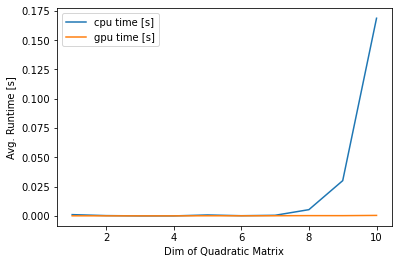

In [54]:
# plot the results
plt.plot(dims, cpu_times, label = "cpu time [s]")
plt.plot(dims, gpu_times, label = "gpu time [s]")
plt.legend(loc="upper left")
plt.xlabel("Dim of Quadratic Matrix")
plt.ylabel("Avg. Runtime [s]")

we can see that the GPU has an advantage in terms of speed if the quadratic matrix has more than 6 Dimensions and hence is larger than $6\times6$.

Does this also hold up for other matrices?

In [62]:
dims = range(1,20)

print("GPU is available: ", torch.cuda.is_available())
device = torch.device("cuda")

cpu_times = []
gpu_times = []
for dim in dims:
    print("Calculating comparison for ", dim, " dimensions")
    # create matrix
    X = torch.rand(100, 2**dim, dtype = torch.float32)
    Y = torch.transpose(X, 0,1)
    
    # time cpu timing
    cpu = timeit.timeit("X@Y", globals=globals(), number = 10)
    cpu_times.append(cpu)

    # time gpu timing
    X = X.to(device)
    Y = Y.to(device)
    gpu = timeit.timeit("X@Y", globals=globals(), number = 10)
    gpu_times.append(gpu)


GPU is available:  True
Calculating comparison for  1  dimensions
Calculating comparison for  2  dimensions
Calculating comparison for  3  dimensions
Calculating comparison for  4  dimensions
Calculating comparison for  5  dimensions
Calculating comparison for  6  dimensions
Calculating comparison for  7  dimensions
Calculating comparison for  8  dimensions
Calculating comparison for  9  dimensions
Calculating comparison for  10  dimensions
Calculating comparison for  11  dimensions
Calculating comparison for  12  dimensions
Calculating comparison for  13  dimensions
Calculating comparison for  14  dimensions
Calculating comparison for  15  dimensions
Calculating comparison for  16  dimensions
Calculating comparison for  17  dimensions
Calculating comparison for  18  dimensions
Calculating comparison for  19  dimensions


Text(0, 0.5, 'Avg. Runtime [s]')

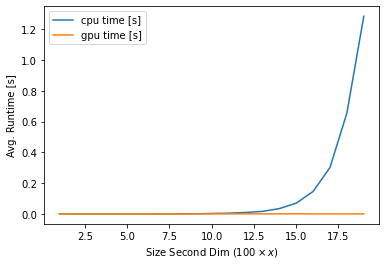

In [68]:
# plot the results
plt.plot(dims, cpu_times, label = "cpu time [s]")
plt.plot(dims, gpu_times, label = "gpu time [s]")
plt.legend(loc="upper left")
plt.xlabel("Size Second Dim ($100 \\times x$)")
plt.ylabel("Avg. Runtime [s]")

For the small toy example it is shown, that Cuda is faster after the second dimension is larger than 10.

## Exercise 4 
Write pytorch code that finds the minimum to a more complicated function, in particular 
$$f(x) = \sin(x-2)\cdot (x+2)^2 + \sqrt{|\cos(x)|}$$
Note: To take advantage of the autograd mechanism, the function must be implemented solely using torch functions.

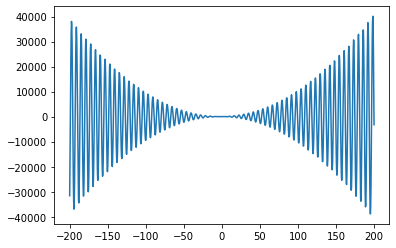

In [77]:
def f(x):
    return torch.sin(x-2) * torch.pow(x+2, 2) + torch.sqrt(torch.abs(torch.cos(x)))

x_range = np.linspace(-200,200, num = 1000)
y_val = f(torch.tensor(x_range)).numpy()
plt.plot(x_range,y_val)

The plot shows, that the function has no minimum. However, I will still try to find the minimum with pytorch.

In [94]:
# create a parameters, which should be tracked by the optimizer
param = torch.nn.Parameter(torch.tensor([0.5]), requires_grad =True)
optimizer = torch.optim.SGD(params=[param], lr = 0.3)
epochs = 100

for e in range(epochs):
    # reset the gradient
    optimizer.zero_grad()

    # calculate loss
    loss = f(param)
    # calculate gradient
    loss.backward()

    # go a step in the descending direction
    optimizer.step()

print(param.data)

tensor([-2.0299])


Depending on the learning rate, the above code leads to different outputs, because we are trapped in a local minimum. 